#  Video Game Sales Dataset

## 1. Goal of the Analysis

### Business Goals:

Predict global sales of video games to help publishers prioritize platforms, genres, and regions.

Identify market trends to guide game development and marketing strategies.

## 2. Import Lib

In [34]:
import pandas as pd
import matplotlib.pyplot as plot 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 3. Import Dataset with Pandas

In [13]:
df=pd.read_csv(r"C:\Users\HP\Downloads\data_analysis_python_jupyter\vediogames\vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 4. Data Cleaning

### step 1:Check for Missing Data

In [15]:
print("Mssing Values:")
print(df.isnull().sum())

Mssing Values:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### Step 2:  Handle Missing Values

In [20]:
#drop rows with missing year 
df.dropna(subset='Year', inplace=True)
# fill missing publisher with unknown
df['Publisher'] = df['Publisher'].fillna('unknown')

In [21]:
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [91]:
df = df.drop(['Publisher', 'Name'], axis=1)  
df

,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Age
0,1,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74,19.0
1,2,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,40.0
2,3,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82,17.0
3,4,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00,16.0
4,5,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,29.0
...,...,...,...,...,...,...,...,...,...,...
16593,16596,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,0.01,23.0
16594,16597,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,0.01,22.0
16595,16598,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,0.01,17.0
16596,16599,DS,2010.0,Puzzle,0.00,0.01,0.00,0.00,0.01,15.0


### Step 3: Final Check

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [23]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Exploratory Data Analysis (EDA) 

### key business Questions

#### 1. Which Platforms Have the Highest Global Sales?

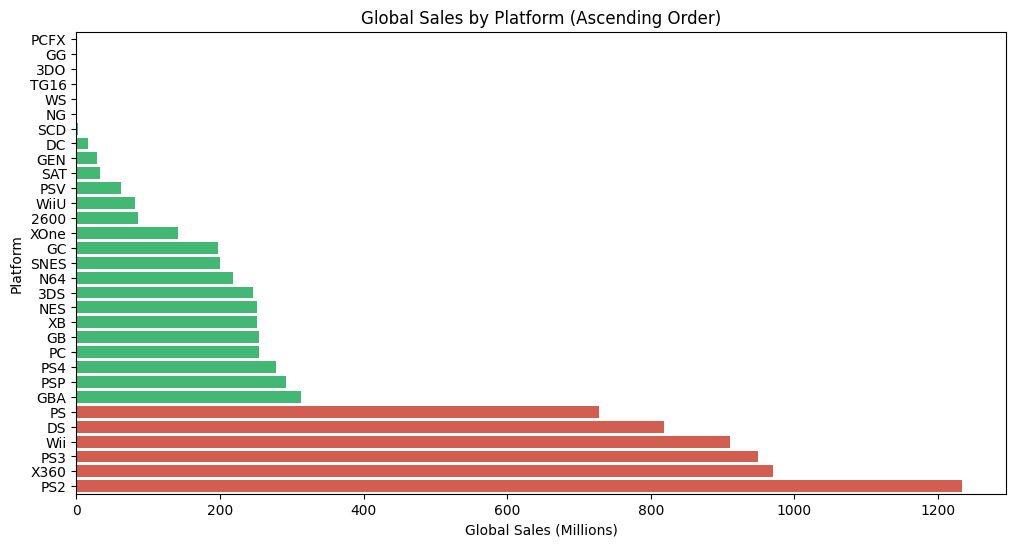

In [27]:
platform_sales=df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=True)
plot.figure(figsize=(12,6))
sns.barplot(x=platform_sales.values, y=platform_sales.index, hue=platform_sales.index,legend=False, palette=['#2ecc71' if x < 500 else '#e74c3c' for x in platform_sales])
plot.title('Global Sales by Platform (Ascending Order)')
plot.xlabel('Global Sales (Millions)')
plot.show()

#### PS2, X360, PS3 dominate sales, reflecting their popularity in the 2000s.

#### 2. How Have Sales Trends Changed Over the Years?

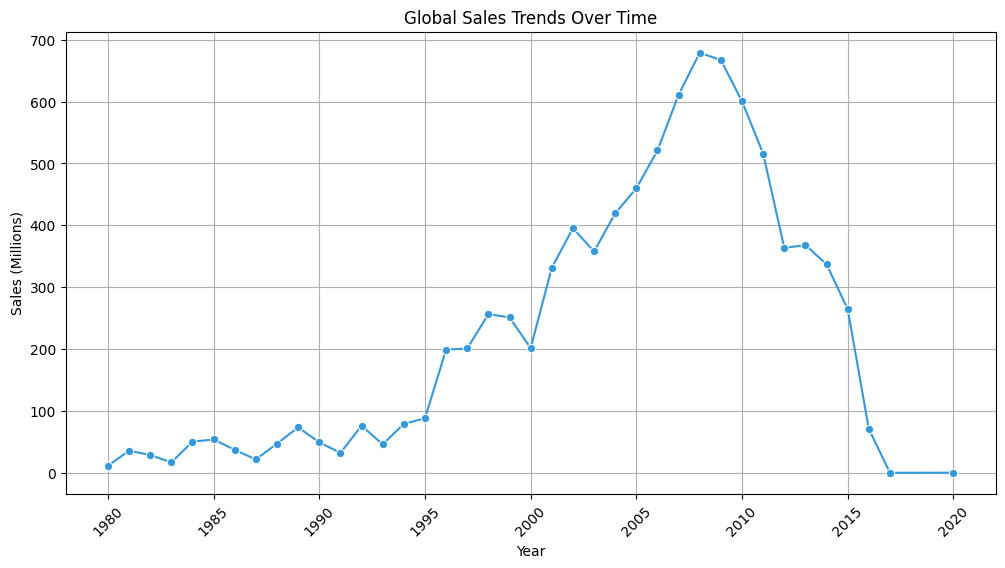

In [101]:
yaerly_sales=df.groupby('Year')['Global_Sales'].sum().reset_index()
plot.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Global_Sales', data= yaerly_sales , color='#3498db', marker='o')
plot.title('Global Sales Trends Over Time')
plot.xlabel('Year')
plot.ylabel('Sales (Millions)')
plot.xticks(rotation=45)
plot.grid(True)
plot.show()

#### Peak in 2008-2010: Coincides with releases for PS3/X360.

#### Post-2010 Decline: Likely due to mobile gaming and fewer blockbuster releases.

#### 3. Which Genres Are Most Profitable?

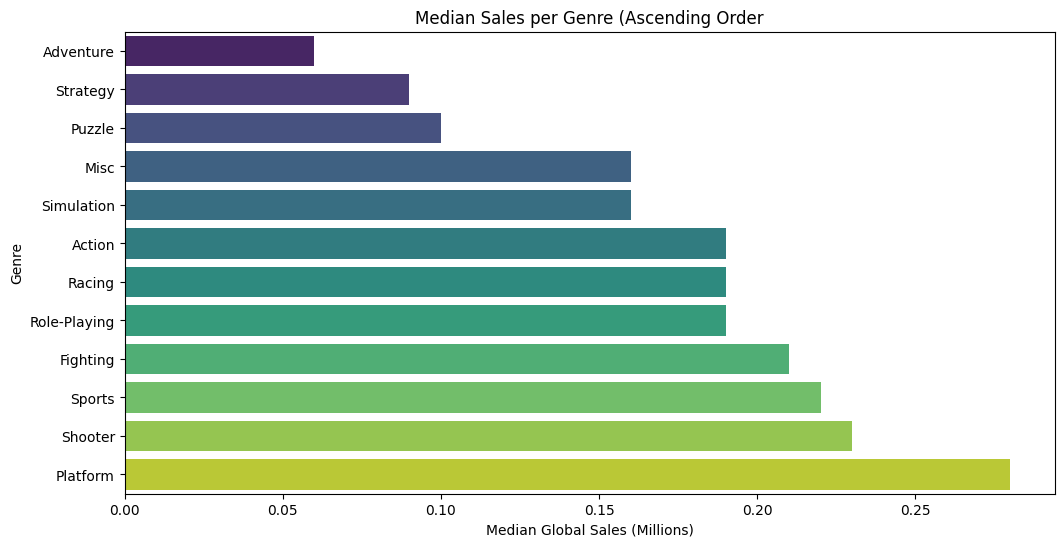

In [47]:
genre_sales= df.groupby('Genre')['Global_Sales'].median().sort_values(ascending= True)
plot.figure(figsize=(12,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index ,hue=genre_sales.index, legend=False,  palette='viridis' )
plot.title('Median Sales per Genre (Ascending Order')
plot.xlabel('Median Global Sales (Millions)')
plot.show()

#### Sports, Shooter, Platform genres have the highest median sales per game.

#### Puzzle, Strategy genres are less profitable.
#### Implications:

##### Resource Allocation:

#### Invest in Sports/Shooter/Platform franchises (e.g., annual FIFA updates, Call of Duty sequels).

#### Limit budgets for Puzzle/Strategy games unless targeting niche audiences (e.g., indie studios).

#### 4. Are There Regional Sales Differences?

<Figure size 1200x600 with 0 Axes>

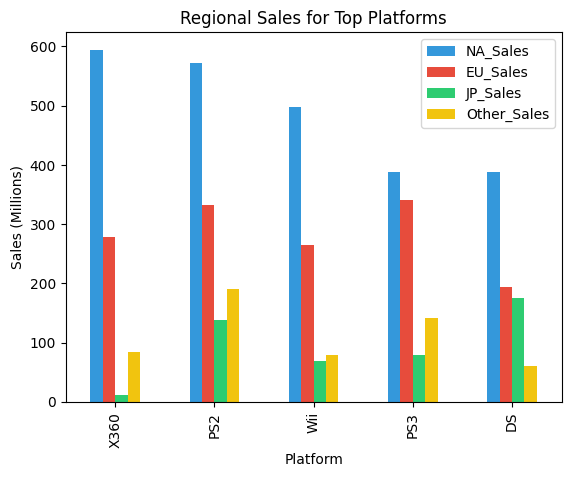

In [58]:
regional_sales=df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().nlargest(5,'NA_Sales')
plot.figure(figsize=(12,6))
regional_sales.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71', '#f1c40f'])
plot.title('Regional Sales for Top Platforms')
plot.ylabel('Sales (Millions)')
plot.show()

#### NA Dominance: North America leads in sales for most platforms.

#### JP Preference: Nintendo platforms (e.g., 3DS) dominate in Japan.
#### Implications:
##### Market Research:

Analyze regional trends (e.g., NA’s preference for competitive multiplayer, JP’s love for turn-based RPGs).

#### Platform & Market Trends
1- Platform-Genre Dominance

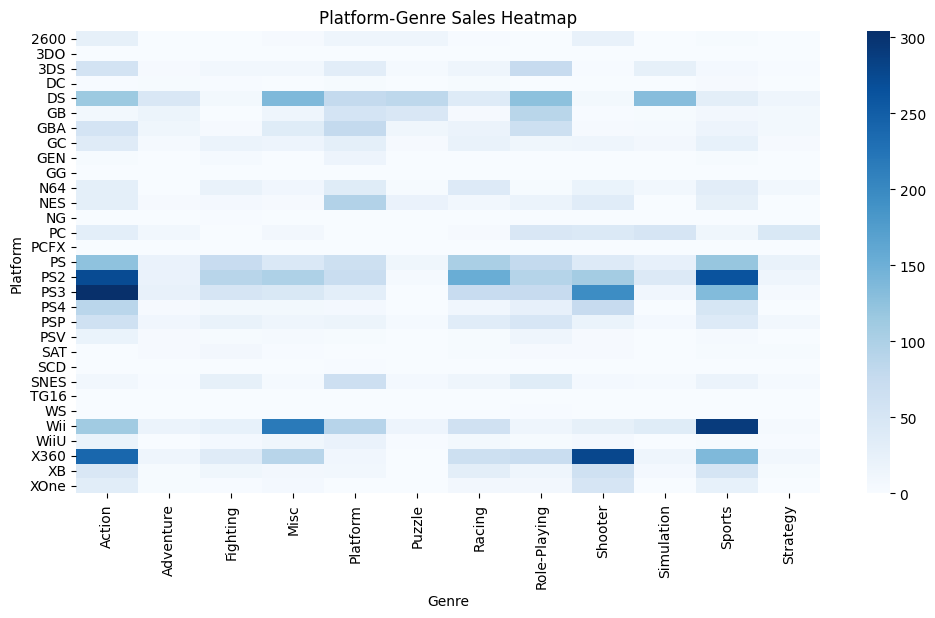

In [65]:
platform_genre= df.groupby(['Platform','Genre'])['Global_Sales'].sum().unstack().fillna(0)
plot.figure(figsize=(12,6))
sns.heatmap(platform_genre, cmap='Blues', annot=False)
plot.title('Platform-Genre Sales Heatmap')
plot.show()

#### Platform	Genre	Example Games (High-Selling)
#### PS2	Action	     GTA: San Andreas, God of War
#### PS3	Action	      Uncharted, The Last of Us
#### X360	Shooter    	Halo 3, Call of Duty: Modern Warfare
#### Implication
#### Audience Targeting:
Market Action games to PlayStation’s story-driven audience and Shooters to Xbox’s multiplayer-focused base.

#### Genre & Profitability
#### 5. Regional Genre Preferences 

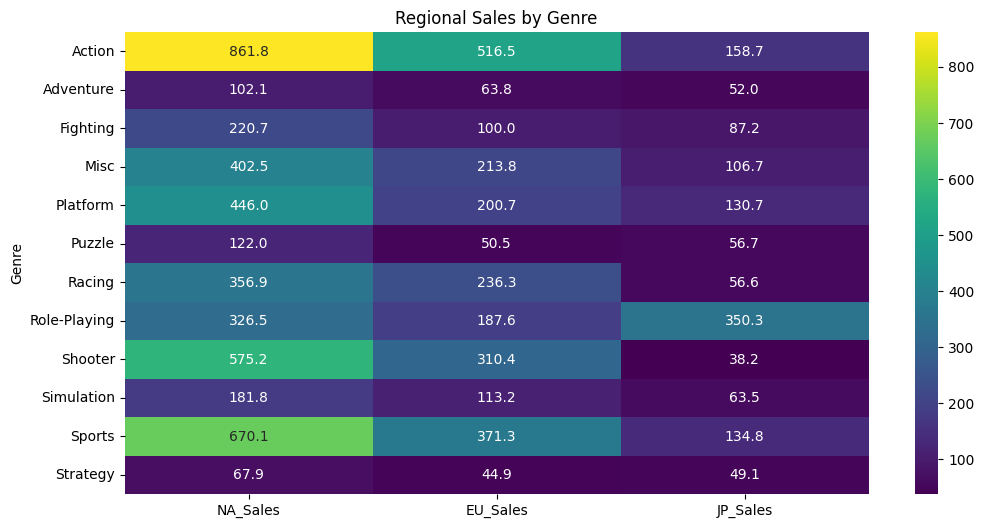

In [72]:
genre_regional= df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()
plot.figure(figsize=(12,6))
sns.heatmap(genre_regional,cmap='viridis', annot=True, fmt='.1f')
plot.title('Regional Sales by Genre')
plot.show()

### 1. North America (NA) and Europe (EU) Prefer Action Games

Western markets (NA/EU) favor fast-paced, competitive, and visually intense games.

Popular franchises: Call of Duty, Grand Theft Auto, Assassin’s Creed.

Business Implication: Prioritize Action games for NA/EU releases.

### 2. Japan (JP) Loves Role-Playing Games (RPGs)


Japanese gamers value storytelling, character development, and strategic gameplay (e.g., Final Fantasy, Dragon Quest, Pokémon).

Cultural affinity for anime-style aesthetics and turn-based mechanics.

Business Implication: Invest in RPGs for the Japanese market.

## Convert Categorical Variables to Numeric


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])
df['Platform_encoded'] = le.fit_transform(df['Platform'])

### Split into features (X) and target (y)

In [94]:
X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']

### Split data

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train model

In [96]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

###  Evaluate


In [97]:
y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

MAE: 0.02
MSE: 0.92
R²: 0.79
